In [32]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

In [11]:
ckd = pd.read_csv('ChronicKidneyDisease.csv')

In [12]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
ckd.drop(["id"], axis=1, inplace=True)

In [14]:
ckd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [15]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

Let's examine categorical and numerical features 

In [16]:
categorical_cols = [col for col in ckd.columns if ckd[col].dtype == "object"]

In [17]:
print(categorical_cols)

['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [18]:
len(categorical_cols)

14

In [19]:
num_cols = [col for col in ckd.columns if ckd[col].dtype != "object"]
len(num_cols)

11

In [20]:
for col in categorical_cols:
    print(f"{col}: {ckd[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
pcv: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5

Let's correct the typos 

In [21]:
ckd["pcv"].replace(to_replace = {"\t?":"", "\t43":"43"}, inplace=True)
ckd["wc"].replace(to_replace = {"\t6200":"6200", "\t8400":"8400","\t?":""}, inplace=True)
ckd["rc"].replace(to_replace = {"\t?":""}, inplace=True)
ckd["dm"].replace(to_replace = {" yes":"yes", "\tno":"no", "\tyes":"yes"}, inplace=True)
ckd["cad"].replace(to_replace = {"\tno":"no"}, inplace=True)
ckd["classification"].replace(to_replace = {"ckd\t":"ckd"}, inplace=True)

For now we're gonna handle the no data values by replacing them with actual np.nan, we'll later impute them 

In [22]:
ckd.replace('notpresent', np.nan, inplace=True)

Some columns are of the wrong type we're gonna convert them to numerical 

In [23]:
#Convert data types that are still wrong
columns_to_convert = ['pcv', 'wc', 'rc']

# Convert each column to numeric
for col in columns_to_convert:
    ckd[col] = pd.to_numeric(ckd[col], errors='coerce')  

In [24]:
categorical_cols2 = [col for col in ckd.columns if ckd[col].dtype == "object"]
len(categorical_cols2)

11

In [25]:
for col in categorical_cols2:
    print(f"{col}: {ckd[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: [nan 'present']
ba: [nan 'present']
htn: ['yes' 'no' nan]
dm: ['yes' 'no' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
classification: ['ckd' 'notckd']


In [26]:
num_cols2 = [col for col in ckd.columns if ckd[col].dtype != "object"]
len(num_cols2)

14

In [27]:
#Convert categorical features to corresponding data type
for col in categorical_cols2:
    ckd[col] = ckd[col].astype('category')

Box plots of numerical features 

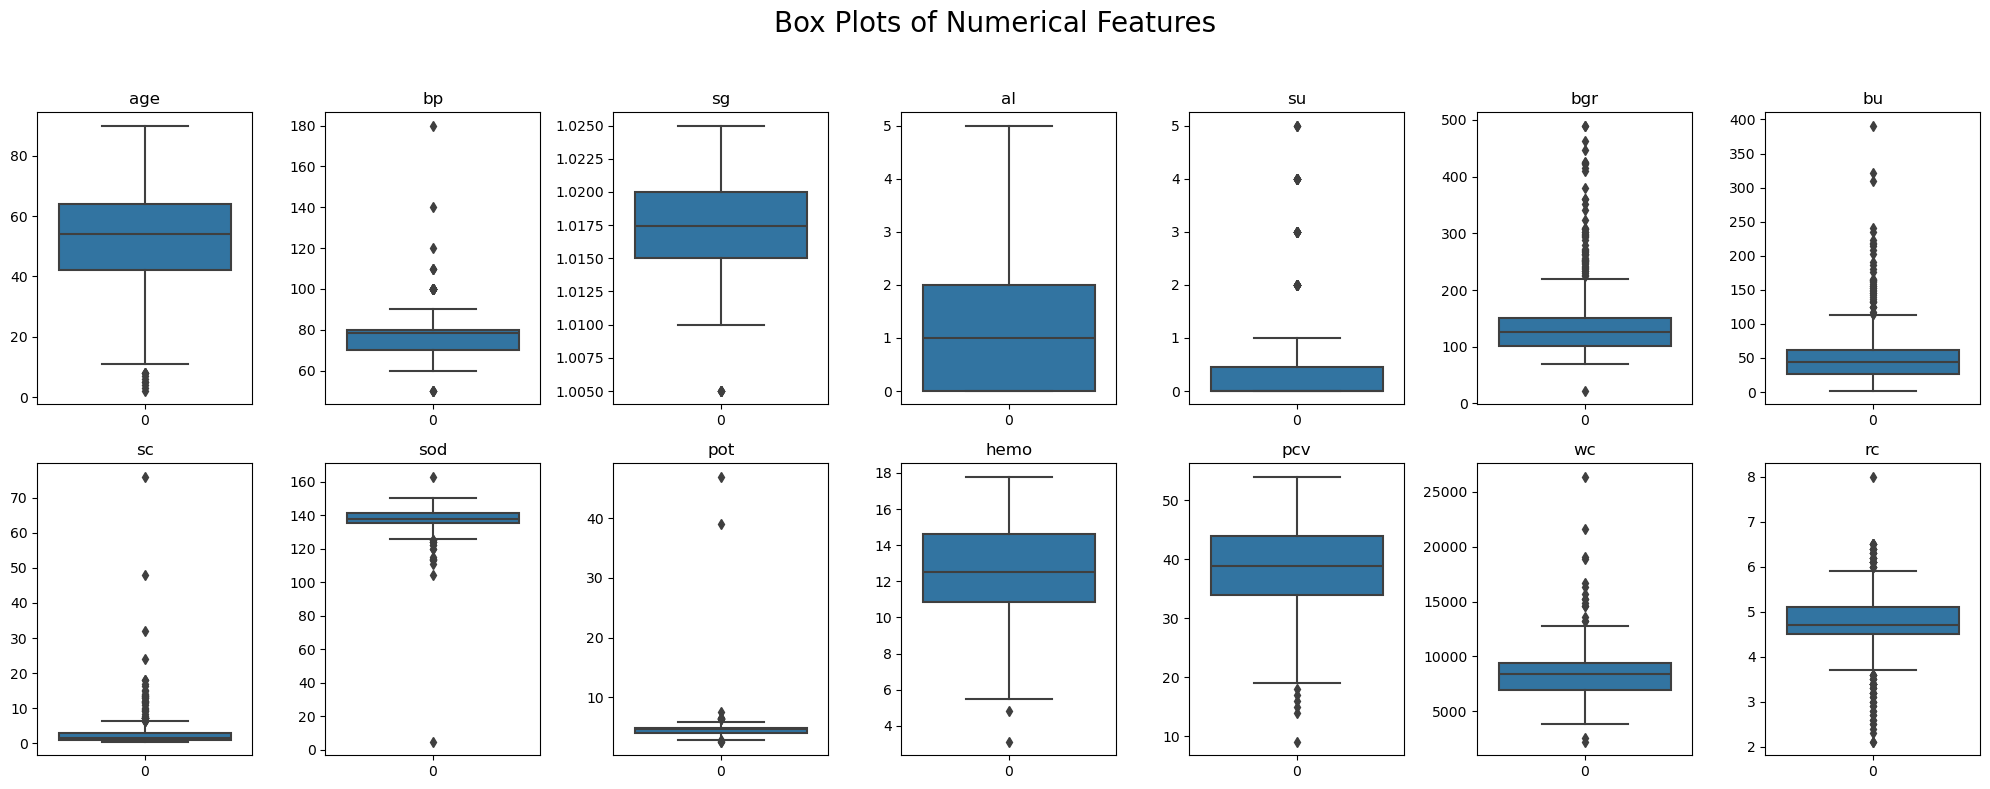

In [35]:
n_rows = 2
n_cols = 7

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 8))
fig.suptitle('Box Plots of Numerical Features', fontsize=20)

for index, column in enumerate(num_cols2):
    i, j = divmod(index, n_cols)  # Calculate the row and column index
    sns.boxplot(ckd[column], ax=axes[i, j])
    axes[i, j].set_title(column)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

We observe the presence of many outliers in most of the features, since these are biological measures, and I'm no medical expert, we're gonna ignore them for this classification problem.

For missing numeric values, we're gonna replace them with the feature average

In [28]:
ckd[num_cols2] = ckd[num_cols2].fillna(ckd[num_cols2].mean())

For missing categorical values, we'll replace them with the feature most occuring value

In [156]:
for col in categorical_cols2:
    mode_value = ckd[col].mode().iloc[0]  
    ckd[col].fillna(mode_value, inplace=True)

We will now encode categorical features using one hot encoding

In [36]:
ckd_encoded = pd.get_dummies(ckd, columns=categorical_cols2, drop_first=True)
ckd_encoded = ckd_encoded.astype(int)

Scaling our data 

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
normalized_ckd = pd.DataFrame(scaler.fit_transform(ckd_encoded), columns=ckd_encoded.columns)

In [41]:
normalized_ckd.head(3)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rc,rbc_normal,pc_normal,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0.522727,0.230769,0.0,0.2,0.0,0.211538,0.089744,0.013158,0.836478,0.044444,...,0.500000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.0,0.8,0.0,0.269231,0.043590,0.000000,0.836478,0.044444,...,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.0,0.4,0.6,0.856838,0.133333,0.013158,0.836478,0.044444,...,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [42]:
normalized_ckd.rename(columns={'classification_notckd': 'classification'}, inplace=True)

Remove the ground-truth column and store its values aside

In [43]:
classification_values = normalized_ckd['classification']
ckd = normalized_ckd.drop(columns=['classification'])

We're gonna try SVM algorithm (support vector machines) with different kernels and see what gives the best performance

In [60]:
X = ckd
Y = classification_values


kernel_params = [
    {'kernel': 'linear', 'C': 1.0},
    {'kernel': 'poly', 'C': 1.0, 'degree': 3, 'gamma': 'scale', 'coef0': 1},
    {'kernel': 'poly', 'C': 1.0, 'degree': 5, 'gamma': 'scale', 'coef0': 1},
    {'kernel': 'rbf', 'C': 1.0, 'gamma': 0.5},
    {'kernel': 'rbf', 'C': 1.0, 'gamma': 1.0},
    {'kernel': 'sigmoid', 'C': 1.0, 'gamma': 0.5, 'coef0': 0.0},
    {'kernel': 'sigmoid', 'C': 1.0, 'gamma': 1.0, 'coef0': 1.0},
]


kf = KFold(n_splits=10, shuffle=True, random_state=42)


for params in kernel_params:
    clf = svm.SVC(**params)  
    precision_per_class = np.zeros(2)  
    recall_per_class = np.zeros(2)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        clf.fit(X_train, y_train)  #fitting the model
        y_pred = clf.predict(X_test)  #predictions

        # Calculate precision and recall for each class
        for class_label in range(2):  
            precision_per_class[class_label] += precision_score(y_test, y_pred, labels=[class_label], average='micro')
            recall_per_class[class_label] += recall_score(y_test, y_pred, labels=[class_label], average='micro')

    # Average precision and recall across all folds
    average_precision = precision_per_class / kf.get_n_splits()
    average_recall = recall_per_class / kf.get_n_splits()

    # Print the results
    print(f"Kernel: {params['kernel']}, Parameters: {params}")
    for class_label in range(2):
        print(f"  Class {class_label} - Average Precision: {average_precision[class_label]:.2f}, Average Recall: {average_recall[class_label]:.2f}")
    print("--------------------------------------------------")

Kernel: linear, Parameters: {'kernel': 'linear', 'C': 1.0}
  Class 0 - Average Precision: 1.00, Average Recall: 0.95
  Class 1 - Average Precision: 0.92, Average Recall: 1.00
--------------------------------------------------
Kernel: poly, Parameters: {'kernel': 'poly', 'C': 1.0, 'degree': 3, 'gamma': 'scale', 'coef0': 1}
  Class 0 - Average Precision: 0.99, Average Recall: 0.98
  Class 1 - Average Precision: 0.97, Average Recall: 0.98
--------------------------------------------------
Kernel: poly, Parameters: {'kernel': 'poly', 'C': 1.0, 'degree': 5, 'gamma': 'scale', 'coef0': 1}
  Class 0 - Average Precision: 0.99, Average Recall: 0.98
  Class 1 - Average Precision: 0.97, Average Recall: 0.99
--------------------------------------------------
Kernel: rbf, Parameters: {'kernel': 'rbf', 'C': 1.0, 'gamma': 0.5}
  Class 0 - Average Precision: 1.00, Average Recall: 0.95
  Class 1 - Average Precision: 0.93, Average Recall: 1.00
--------------------------------------------------
Kernel: rb

### Best results appear to be given with kernel poly 5 degrees